Arquivo de referência/dataset: https://open.canada.ca/data/en/dataset/0026eb81-62ff-40bd-9fda-414d2db7ef45

### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head(5)

,REF_DATE,GEO,DGUID,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,NaN,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223,units,0,v4384837,1.1.1.1,41588.0,NaN,NaN,NaN,0
1,1998,Canada,NaN,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266,units,0,v4384838,1.1.1.2,41.7,NaN,NaN,NaN,1
2,1998,Canada,NaN,15 to 19 years,Live births,Number of events,Number,223,units,0,v4384839,1.1.2.1,19721.0,NaN,NaN,NaN,0
3,1998,Canada,NaN,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266,units,0,v4384840,1.1.2.2,19.8,NaN,NaN,NaN,1
4,1998,Canada,NaN,15 to 19 years,Induced abortions,Number of events,Number,223,units,0,v4384841,1.1.3.1,20859.0,NaN,NaN,NaN,0


### Limpeza dos dados

Vamos detectar os dados com campos nulos em excesso e os excluir

- Como as colunas DGUID e STATUS não possuem nenhum dado nós podemos excluí-los tranquilamente.

In [4]:
print(data["DGUID"].unique(),data["STATUS"].unique(),data["SYMBOL"].unique(), data["TERMINATED"].unique())


[nan] [nan] [nan 'r'] [nan 't']


In [5]:
data.drop(columns=["DGUID","STATUS"], inplace=True)

In [6]:
data["SYMBOL"].fillna(0, inplace=True)
data["SYMBOL"].replace(to_replace="n", value=1, inplace=True)
data["TERMINATED"].fillna(0,inplace=True)
data["TERMINATED"].replace(to_replace="t", value=1, inplace=True)
data.head()

,REF_DATE,GEO,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223,units,0,v4384837,1.1.1.1,41588.0,0,0,0
1,1998,Canada,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266,units,0,v4384838,1.1.1.2,41.7,0,0,1
2,1998,Canada,15 to 19 years,Live births,Number of events,Number,223,units,0,v4384839,1.1.2.1,19721.0,0,0,0
3,1998,Canada,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266,units,0,v4384840,1.1.2.2,19.8,0,0,1
4,1998,Canada,15 to 19 years,Induced abortions,Number of events,Number,223,units,0,v4384841,1.1.3.1,20859.0,0,0,0


In [7]:
data.describe().round(1)

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,TERMINATED,DECIMALS
count,960.0,960.0,960.0,960.0,960.0,960.0
mean,1999.0,244.5,0.0,1018.1,0.0,0.5
std,0.8,21.5,0.0,3596.0,0.2,0.5
min,1998.0,223.0,0.0,0.0,0.0,0.0
25%,1998.0,223.0,0.0,13.7,0.0,0.0
50%,1999.0,244.5,0.0,39.8,0.0,0.5
75%,2000.0,266.0,0.0,271.8,0.0,1.0
max,2000.0,266.0,0.0,41588.0,1.0,1.0


Vamos mapear os dados para que possamos correlacionar os dados para uma análise

In [8]:
data.dtypes

REF_DATE                     int64
GEO                         object
Age group                   object
Teen pregnancy outcomes     object
Characteristics             object
UOM                         object
UOM_ID                       int64
SCALAR_FACTOR               object
SCALAR_ID                    int64
VECTOR                      object
COORDINATE                  object
VALUE                      float64
SYMBOL                      object
TERMINATED                   int64
DECIMALS                     int64
dtype: object

In [9]:
len(data["GEO"].unique())

15

In [10]:
for i in list(["GEO","Age group","Teen pregnancy outcomes","Characteristics","UOM"]):
    data[i] = data[i].map(dict(zip(list(data[i].unique()), range(len(data[i].unique())))))

In [11]:
data["SCALAR_FACTOR"].unique()
# É possivel dizer que essa coluna é dispensável, já que tras um unico tipo de dado

array(['units '], dtype=object)

In [12]:
data.drop(columns=["SCALAR_FACTOR","VECTOR"], inplace=True)

In [13]:
data.head()

,REF_DATE,GEO,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_ID,COORDINATE,VALUE,SYMBOL,TERMINATED,DECIMALS
0,1998,0,0,0,0,0,223,0,1.1.1.1,41588.0,0,0,0
1,1998,0,0,0,1,1,266,0,1.1.1.2,41.7,0,0,1
2,1998,0,0,1,0,0,223,0,1.1.2.1,19721.0,0,0,0
3,1998,0,0,1,1,1,266,0,1.1.2.2,19.8,0,0,1
4,1998,0,0,2,0,0,223,0,1.1.3.1,20859.0,0,0,0


In [18]:
corr_analysis=data.drop(columns=["UOM_ID","COORDINATE", "SCALAR_ID"])
corr_analysis.corr().round(2)

,REF_DATE,GEO,Age group,Teen pregnancy outcomes,Characteristics,UOM,VALUE,TERMINATED,DECIMALS
REF_DATE,1.00,0.07,0.00,0.00,-0.00,-0.00,-0.02,-0.15,-0.00
GEO,0.07,1.00,-0.00,0.00,-0.00,-0.00,-0.20,0.34,-0.00
Age group,0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.06,-0.00,-0.00
Teen pregnancy outcomes,0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.18,-0.00,-0.00
Characteristics,-0.00,-0.00,-0.00,-0.00,1.00,1.00,-0.28,0.00,1.00
UOM,-0.00,-0.00,-0.00,-0.00,1.00,1.00,-0.28,0.00,1.00
VALUE,-0.02,-0.20,-0.06,-0.18,-0.28,-0.28,1.00,-0.06,-0.28
TERMINATED,-0.15,0.34,-0.00,-0.00,0.00,0.00,-0.06,1.00,0.00
DECIMALS,-0.00,-0.00,-0.00,-0.00,1.00,1.00,-0.28,0.00,1.00


<AxesSubplot:>

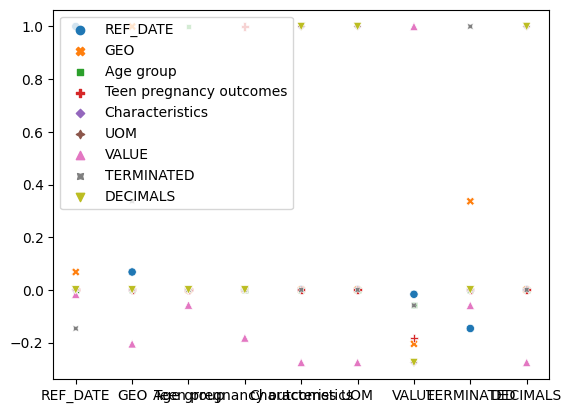

In [19]:
sns.scatterplot(data=corr_analysis.corr())

<AxesSubplot:>

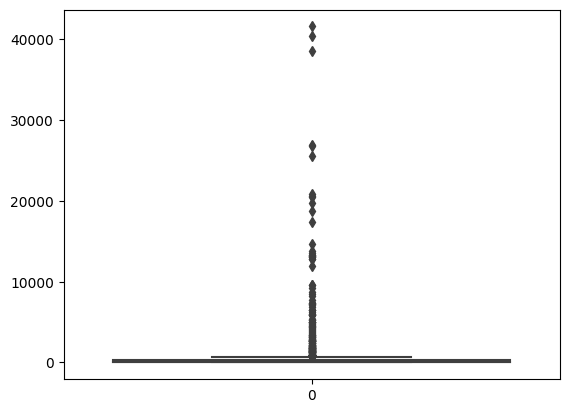

In [27]:
sns.boxplot(data=corr_analysis["VALUE"])